# Surface concentrations

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from itertools import compress
import datetime as dt

%matplotlib notebook

###### Parameters:

In [3]:
imin, imax = 1100, 2050
jmin, jmax = 160, 800

# model results:
results_folder = '/data/brogalla/run_storage/spin-up0-pb_2020-05-28T171622.654059-0400/'
year  = 2002

###### Load files:

In [4]:
mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask     = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

In [5]:
ref1   = nc.Dataset(results_folder+'ANHA12_EXH006_2002_monthly.nc',  'r')
lons   = np.array(ref1.variables['nav_lon'])
lats   = np.array(ref1.variables['nav_lat'])
depth  = np.array(ref1.variables['deptht'])

dissolpb  = np.array(ref1.variables['dissolpb'])[:,0,:,:,:]*10**12

##### Functions:

In [18]:
def plot_layer(month, layer, variable, vmin=0,vmax=35):
    
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/surface-Pb.pickle','rb'))

    x, y = proj1(lons, lats)
    
    variablem = np.ma.masked_where((tmask[layer,:,:] < 0.1), variable[month,layer,:,:])
    contour = proj1.contourf(x, y, variablem, np.arange(vmin,vmax+1,2.5),\
                             cmap=cmocean.cm.dense, vmin=vmin, vmax=vmax, extend='both')

    cbar_ax = fig.add_axes([0.0, 0.16, 0.05, 0.6])
    cbar    = fig.colorbar(contour, cax=cbar_ax)
    cbar.set_label('Dissolved Pb [pM]', fontsize=13) 
    cbar_ax.tick_params(axis='both', which='major', labelsize=13)
    
    return

##### Figures of surface concentrations:

<IPython.core.display.Javascript object>


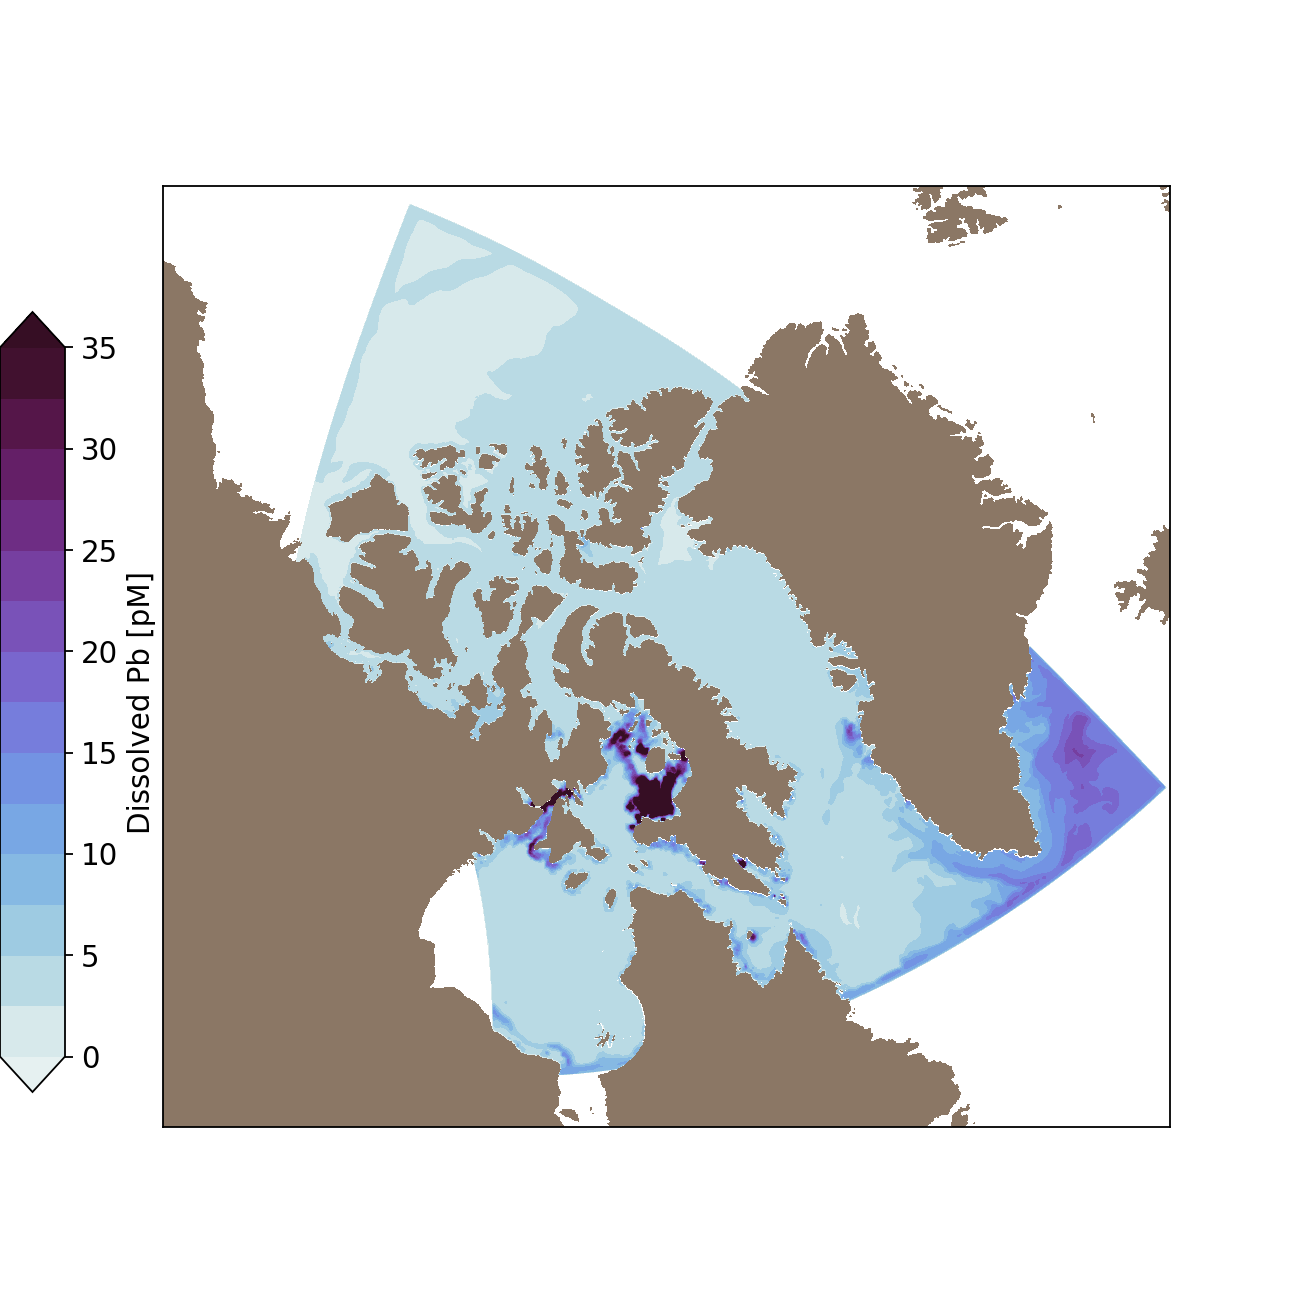

In [32]:
plot_layer(0,0,dissolpb)

<IPython.core.display.Javascript object>


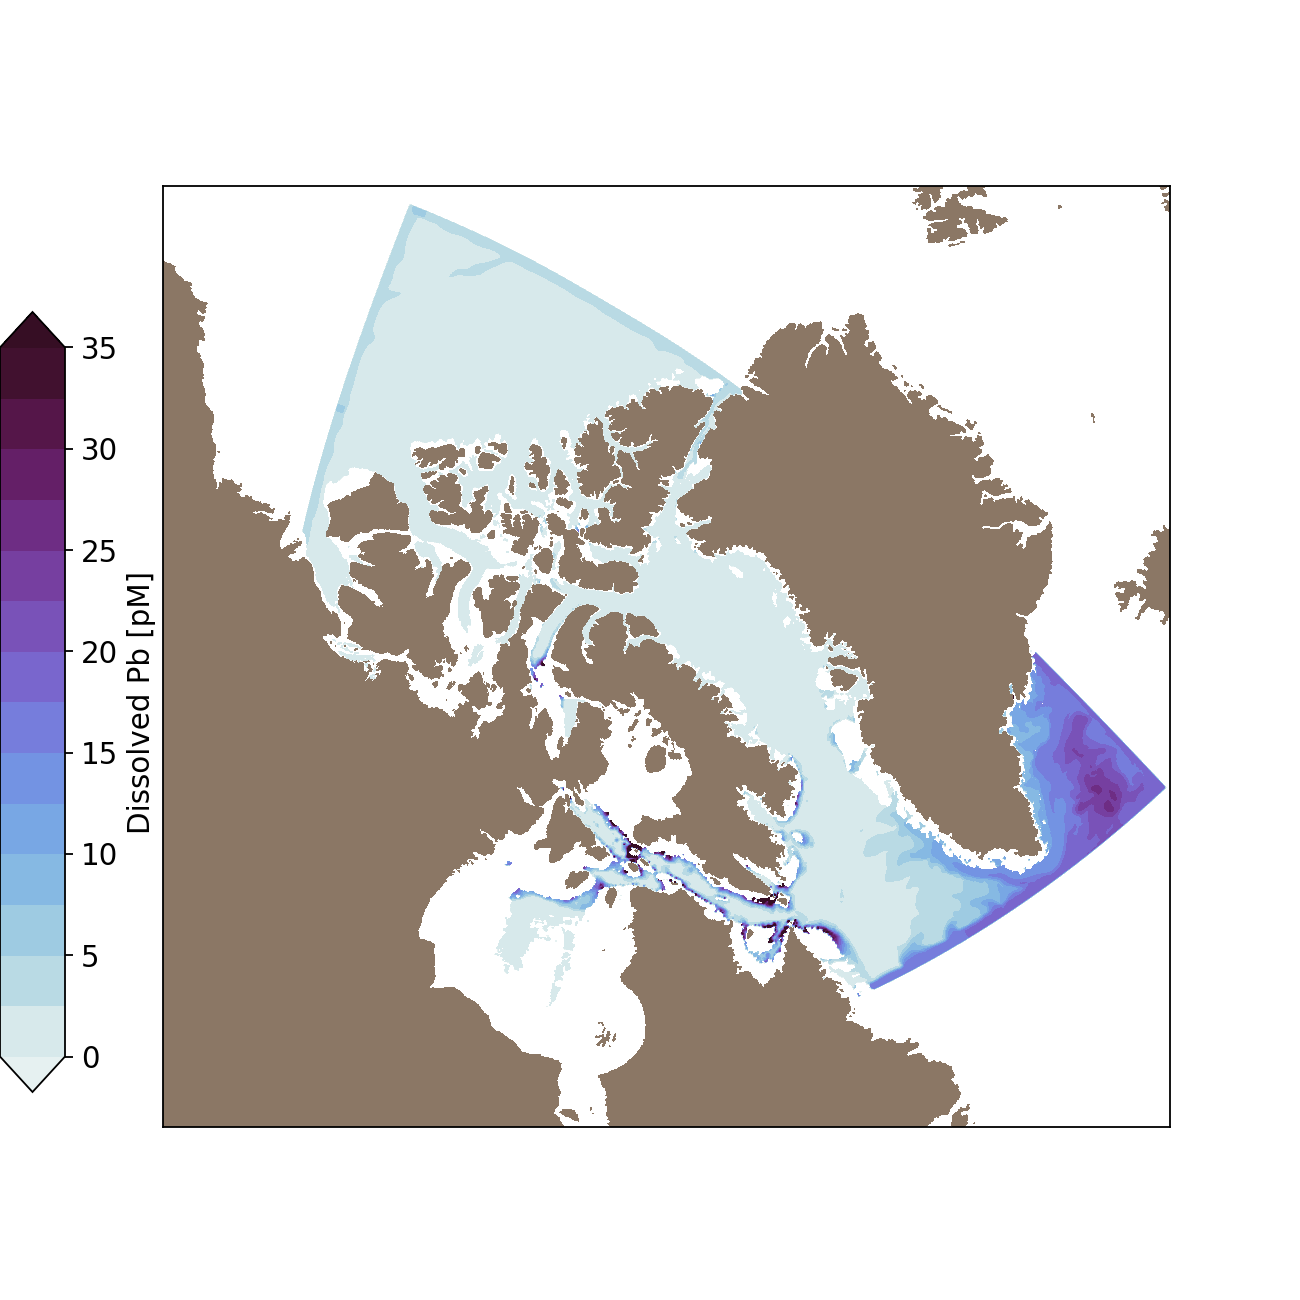

In [26]:
plot_layer(0,25,dissolpb)

<IPython.core.display.Javascript object>


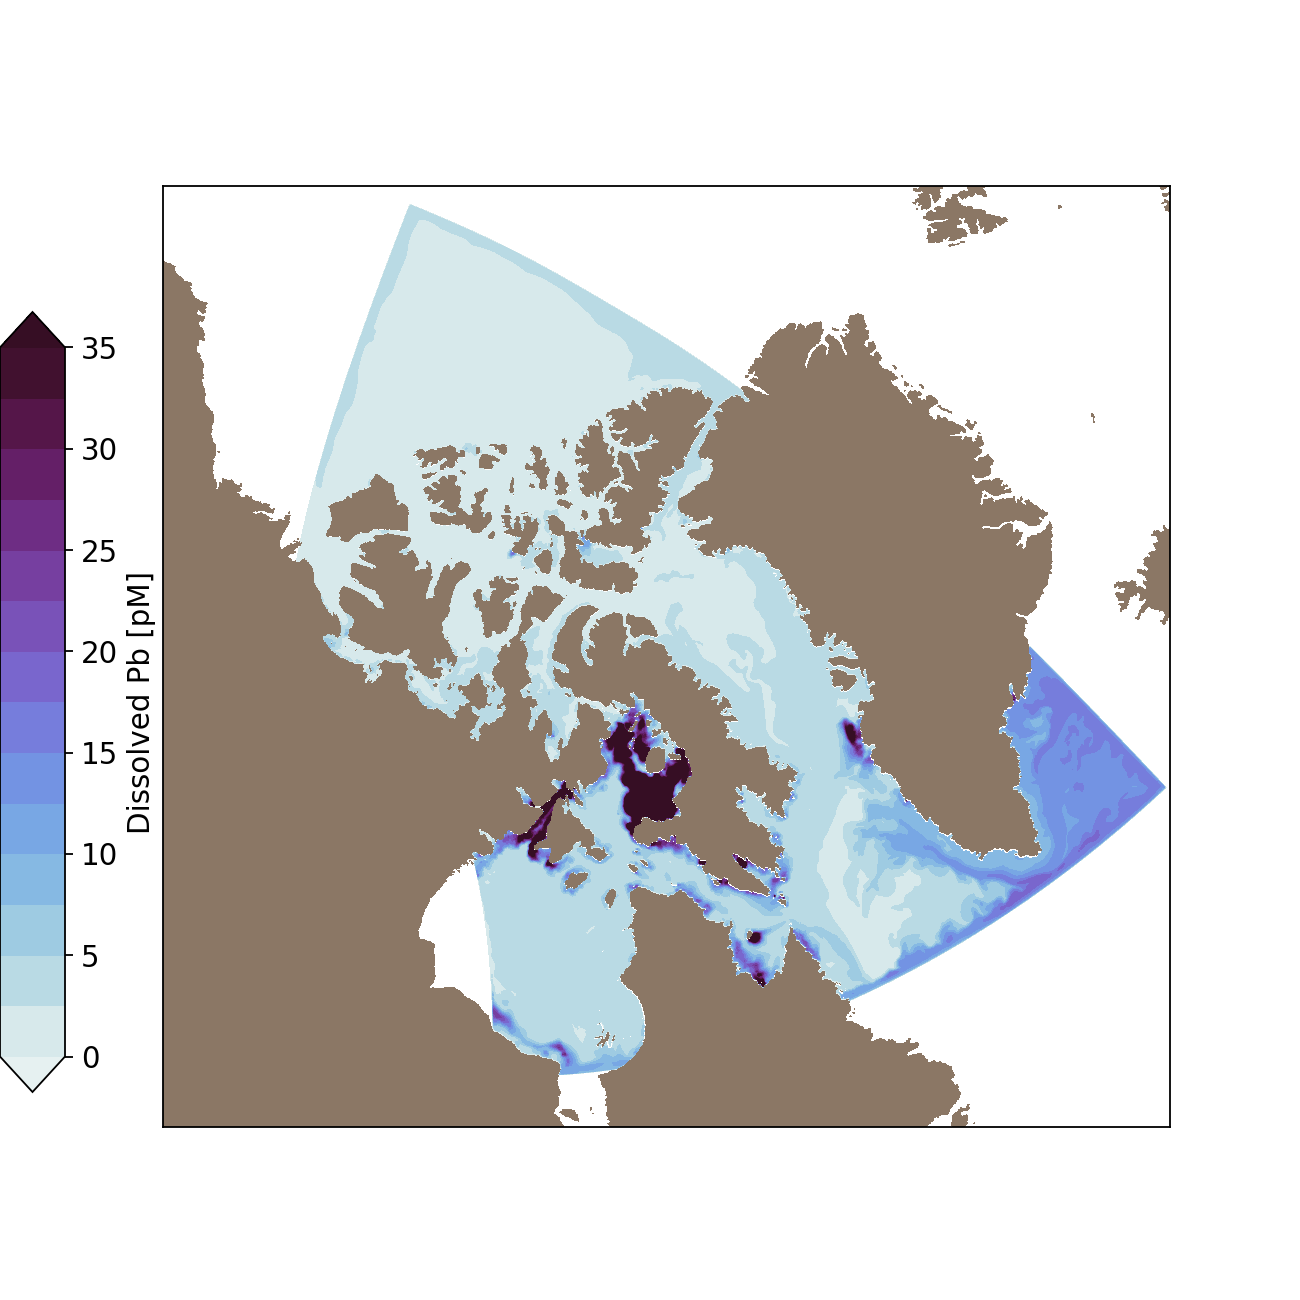

In [21]:
plot_layer(1,0,dissolpb)

<IPython.core.display.Javascript object>


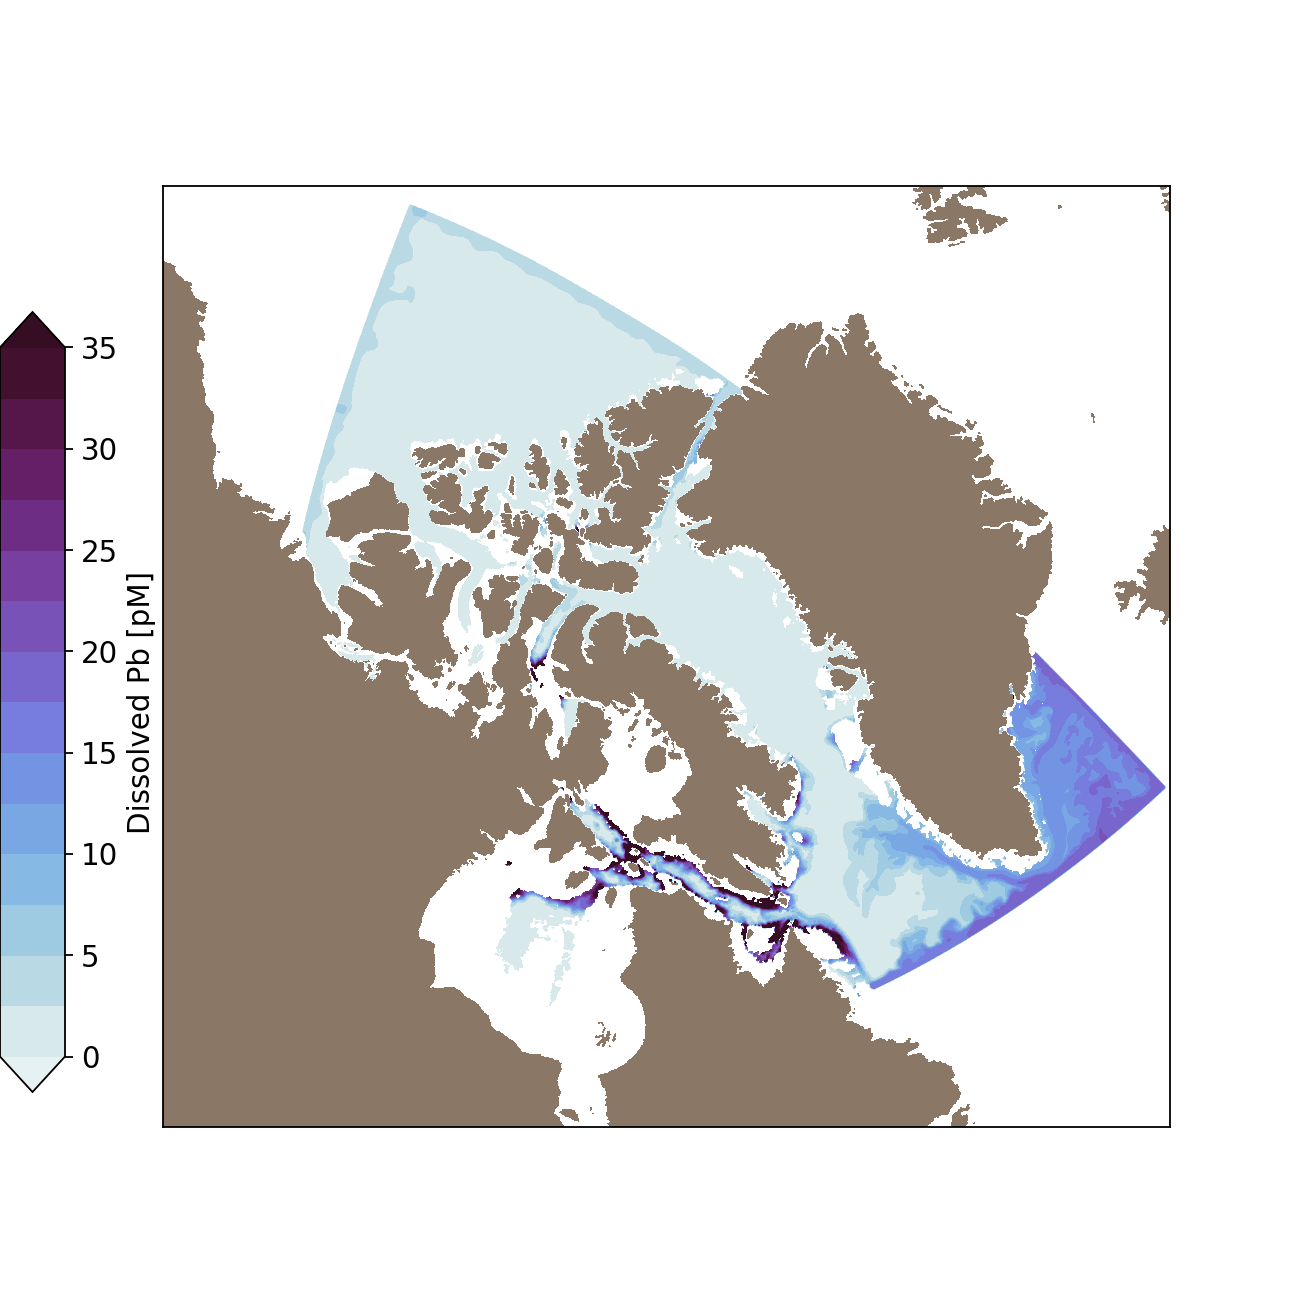

In [27]:
plot_layer(1,25,dissolpb)

<IPython.core.display.Javascript object>


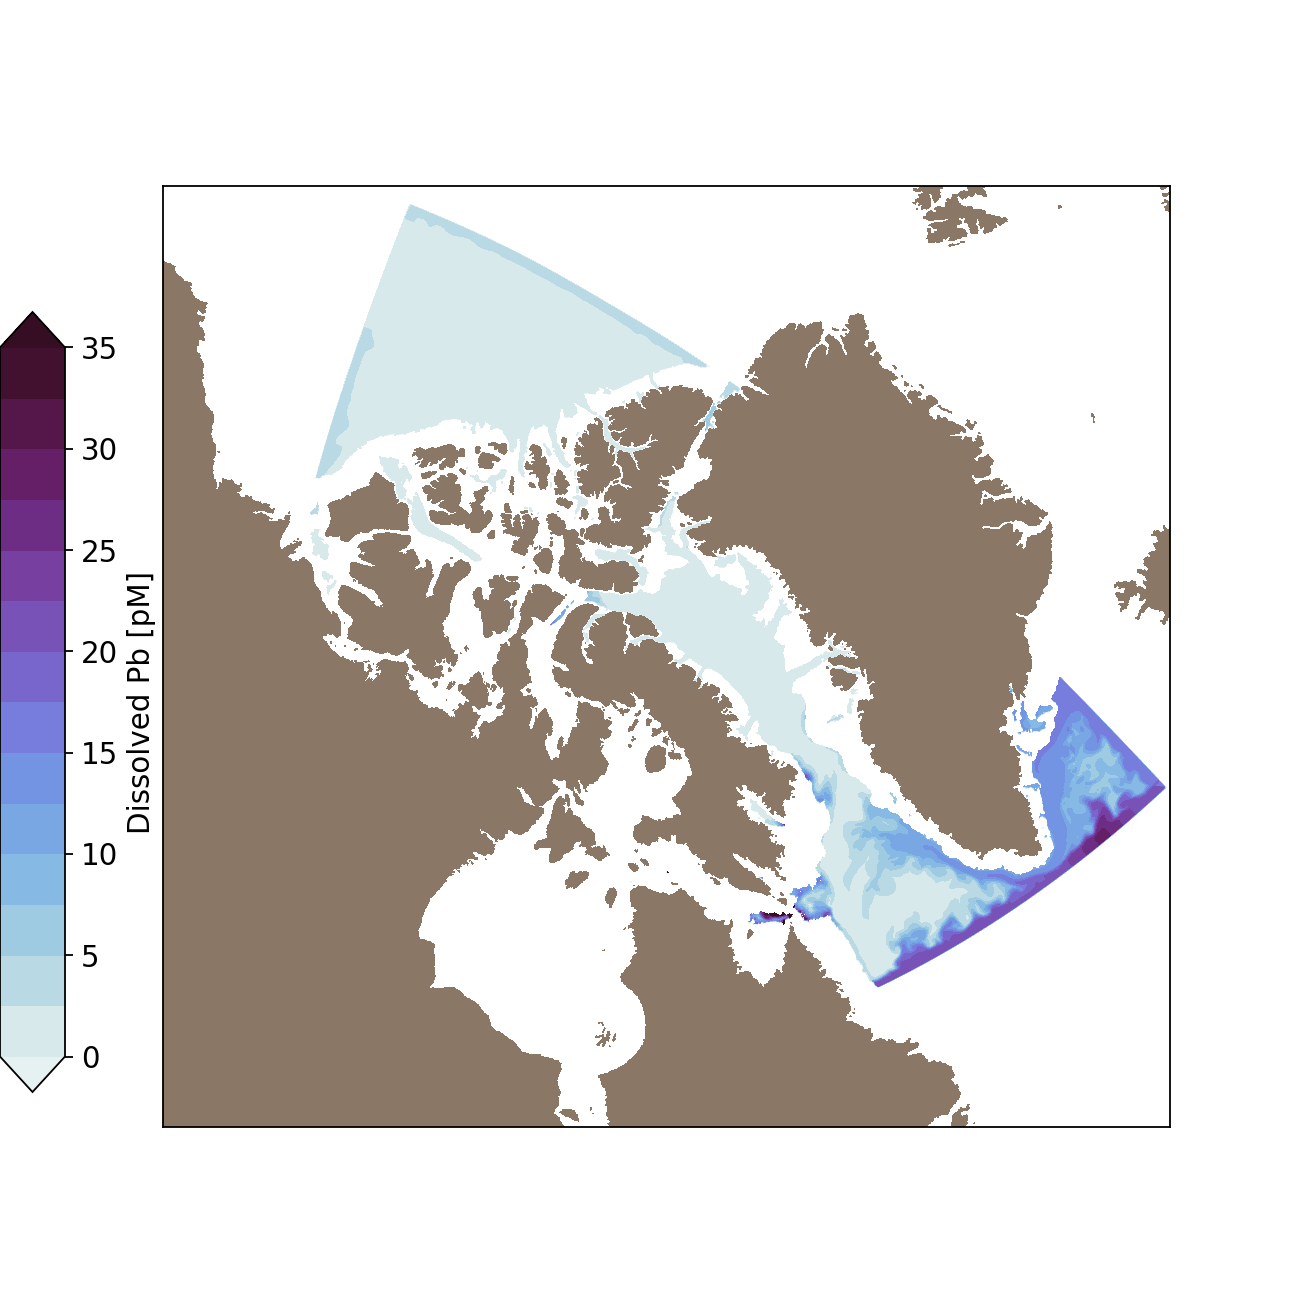

In [28]:
plot_layer(1,30,dissolpb)